In [1]:
import os 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix 
from keras.models import Model
from keras.layers import Input, Conv2D , Dense, Dropout, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
#creating an array and resizing the image by 200 by 200 pixels
def load_images(image_path):
    files = np.array(os.listdir(image_path))

    images = []
    for image in tqdm(files): 
        image = cv2.imread(image_path + image) # For Reading Image
        image = cv2.resize(image, dsize= (200,200)) # Resize Image
        images.append(image)
    images = np.array(images)
    return images



In [3]:
normal_train = load_images('C:/Chest xrays/chest_xray/train/NORMAL/')
pneu_train = load_images ('C:/Chest xrays/chest_xray/train/PNEUMONIA/')

normal_test = load_images('C:/Chest xrays/chest_xray/test/NORMAL/')
pneu_test = load_images ('C:/Chest xrays/chest_xray/test/PNEUMONIA/')

100%|███████████████████████████████████████████████████████████████████████████████| 390/390 [00:01<00:00, 196.03it/s]


In [4]:
print('Normal Train Shape \t', normal_train.shape)
print('Pneumonia Train Shape\t',pneu_train.shape)
print('Normal test Shape \t' , normal_test.shape)
print('Pneumonia Test Shape \t',pneu_test.shape)

Normal Train Shape 	 (1341, 200, 200, 3)
Pneumonia Train Shape	 (3875, 200, 200, 3)
Normal test Shape 	 (231, 200, 200, 3)
Pneumonia Test Shape 	 (390, 200, 200, 3)


X-ray Normal


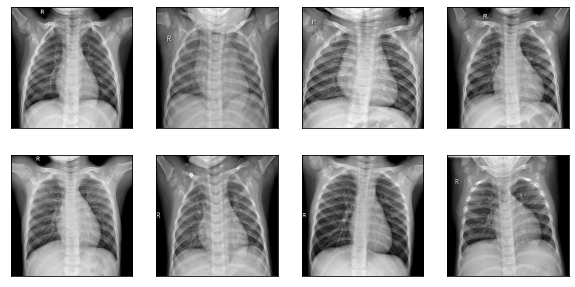

In [5]:
print('X-ray Normal')
fig, axes = plt.subplots(ncols=4, nrows=2 , sharex=False, 
                         sharey=True, figsize=(10,5))
index = 10
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(normal_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index +=1
plt.show()

X-ray Pneumonia


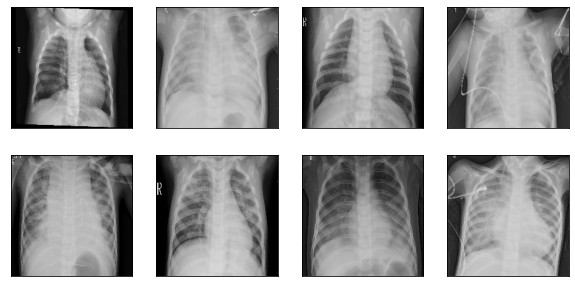

In [6]:
print('X-ray Pneumonia')
fig, axes = plt.subplots(ncols=4, nrows=2 , sharex=False, 
                         sharey=True, figsize=(10,5))
index = 10
for i in range(2):
    for j in range(4):
        axes[i,j].imshow(pneu_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index +=1
plt.show()

In [7]:

X_train = np.vstack((normal_train, pneu_train))
X_test  = np.vstack((normal_test, pneu_test))
print('X_train Shape : \t', X_train.shape)
print('X_test Shape :  \t', X_test.shape)

X_train Shape : 	 (5216, 200, 200, 3)
X_test Shape :  	 (621, 200, 200, 3)


# Preprocessing

In [8]:
#merging the arrays test and train respectively
y_train = np.append([0] * normal_train.shape[0], [1] * pneu_train.shape[0]) 
y_test  = np.append([0]* normal_test.shape[0], [1]* pneu_test.shape[0])

In [9]:
print('y_train Shape : \t', y_train.shape)
print('y_test Shape :  \t', y_test.shape)

y_train Shape : 	 (5216,)
y_test Shape :  	 (621,)


In [10]:
train = np.array(list(zip(X_train, y_train))) 
test  = np.array(list(zip(X_test, y_test)))

#SHUFFLE
np.random.shuffle(train)
np.random.shuffle(test)

# X and Y train Seperated
X_train, y_train = zip(*train) 
X_train = np.array(X_train)
y_train = np.array(y_train)

# X and Y test Seperated
X_test, y_test = zip(*test) 
X_test = np.array(X_test)
y_test = np.array(y_test)


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\3690054041.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(list(zip(X_train, y_train)))
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\3690054041.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test  = np.array(list(zip(X_test, y_test)))


In [11]:
#Data augmentation
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1)

In [12]:
datagen.fit(X_train)

# CNN Architecture

In [13]:
input1 = Input(shape = (200, 200 ,3 ))

In [14]:
cnn = Conv2D(16 ,(3,3) , activation= 'relu', strides=(1,1), padding = 'same')(input1)
cnn = Conv2D(32 ,(3,3) , activation= 'relu', strides=(1,1), padding = 'same')(cnn)
cnn = MaxPool2D((2,2))(cnn)
cnn = Flatten()(cnn)


In [15]:
cnn = Dropout(0.5)(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)
cnn = Dense(50,activation='relu')(cnn)
output1= Dense(1, activation='sigmoid')(cnn)

In [16]:
model = Model(inputs=input1, outputs=output1)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dropout (Dropout)           (None, 320000)            0         
                                                             

In [17]:
#grouping layers
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [18]:
#save point for the model
checkpoint = ModelCheckpoint('model.h5', monitor='val_acc', mode='max',
                            verbose=1, save_best_only=True, save_freq=1)

In [20]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=42),
                   epochs=10, shuffle=True, validation_data=(X_test, y_test),
                   callbacks=[checkpoint])

Epoch 1/10
 51/125 [===========>..................] - ETA: 1:36 - loss: 0.5805 - acc: 0.7689WARNING:tensorflow:Can save best model only with val_acc available, skipping.


103/125 [=======================>......] - ETA: 29s - loss: 0.5149 - acc: 0.7922WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 172s 1s/step - loss: 0.4858 - acc: 0.8012 - val_loss: 0.7686 - val_acc: 0.7874
Epoch 2/10
 29/125 [=====>........................] - ETA: 2:10 - loss: 0.4381 - acc: 0.8030WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 81/125 [==================>...........] - ETA: 57s - loss: 0.4191 - acc: 0.8132WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 167s 1s/step - loss: 0.4065 - acc: 0.8204 - val_loss: 0.8650 - val_acc: 0.7456
Epoch 3/10
  7/125 [>.............................] - ETA: 2:33 - loss: 0.3770 - acc: 0.8333WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 59/125 [=============>................] - ETA: 1:25 - loss: 0.3849 - acc: 0.8359WARNING:tensorflow:Can save best model only with val_acc available, skipping.


111/125 [=========================>....] - ETA: 18s - loss: 0.3856 - acc: 0.8360WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 166s 1s/step - loss: 0.3910 - acc: 0.8338 - val_loss: 0.6173 - val_acc: 0.7955
Epoch 4/10
 37/125 [=======>......................] - ETA: 1:55 - loss: 0.3787 - acc: 0.8353WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 89/125 [====================>.........] - ETA: 47s - loss: 0.3718 - acc: 0.8296WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 167s 1s/step - loss: 0.3635 - acc: 0.8340 - val_loss: 1.1788 - val_acc: 0.7568
Epoch 5/10
 15/125 [==>...........................] - ETA: 2:33 - loss: 0.3722 - acc: 0.8302WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 67/125 [===============>..............] - ETA: 1:24 - loss: 0.3572 - acc: 0.8388WARNING:tensorflow:Can save best model only with val_acc available, skipping.


119/125 [===========================>..] - ETA: 8s - loss: 0.3512 - acc: 0.8407WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 181s 1s/step - loss: 0.3490 - acc: 0.8401 - val_loss: 0.9986 - val_acc: 0.7472
Epoch 6/10
 45/125 [=========>....................] - ETA: 1:47 - loss: 0.3593 - acc: 0.8397WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 97/125 [======================>.......] - ETA: 38s - loss: 0.3546 - acc: 0.8371WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 174s 1s/step - loss: 0.3511 - acc: 0.8399 - val_loss: 0.9134 - val_acc: 0.7472
Epoch 7/10
 23/125 [====>.........................] - ETA: 2:23 - loss: 0.3413 - acc: 0.8468WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 75/125 [=================>............] - ETA: 1:16 - loss: 0.3397 - acc: 0.8479WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 219s 2s/step - loss: 0.3489 - acc: 0.8480 - val_loss: 0.6786 - val_acc: 0.7729
Epoch 8/10
  1/125 [..............................] - ETA: 5:06 - loss: 0.3712 - acc: 0.7857WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 53/125 [===========>..................] - ETA: 1:34 - loss: 0.3441 - acc: 0.8504WARNING:tensorflow:Can save best model only with val_acc available, skipping.


105/125 [========================>.....] - ETA: 26s - loss: 0.3410 - acc: 0.8501WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 168s 1s/step - loss: 0.3400 - acc: 0.8497 - val_loss: 0.7089 - val_acc: 0.7617
Epoch 9/10
 31/125 [======>.......................] - ETA: 2:01 - loss: 0.3011 - acc: 0.8610WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 83/125 [==================>...........] - ETA: 53s - loss: 0.3166 - acc: 0.8604WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 164s 1s/step - loss: 0.3202 - acc: 0.8576 - val_loss: 0.7597 - val_acc: 0.7778
Epoch 10/10
  9/125 [=>............................] - ETA: 2:30 - loss: 0.3412 - acc: 0.8545WARNING:tensorflow:Can save best model only with val_acc available, skipping.


 61/125 [=============>................] - ETA: 1:22 - loss: 0.3279 - acc: 0.8564WARNING:tensorflow:Can save best model only with val_acc available, skipping.


113/125 [==========================>...] - ETA: 15s - loss: 0.3283 - acc: 0.8557WARNING:tensorflow:Can save best model only with val_acc available, skipping.


125/125 [==============================] - 165s 1s/step - loss: 0.3270 - acc: 0.8566 - val_loss: 0.8014 - val_acc: 0.7729


In [21]:
model.save('C:/Chest xrays/chest_xray')

INFO:tensorflow:Assets written to: C:/Chest xrays/chest_xray\assets


INFO:tensorflow:Assets written to: C:/Chest xrays/chest_xray\assets


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\1155367895.py:6: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  plt.legend('loss', 'val_loss')
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\1155367895.py:6: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('loss', 'val_loss')
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\1155367895.py:6: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('loss', 'val_loss')
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\1155367895.py:6: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: https://

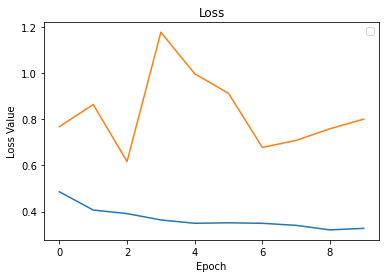

In [22]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend('loss', 'val_loss')
plt.show()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\1899969965.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('acc', 'val_acc')
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_8980\1899969965.py:6: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('acc', 'val_acc')


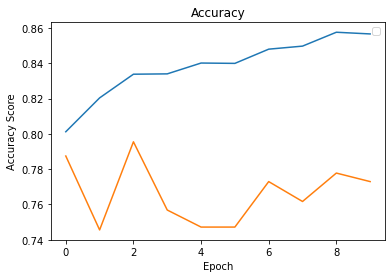

In [23]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend('acc', 'val_acc')
plt.show()

In [25]:
print(model.evaluate(X_test,y_test))

20/20 [==============================] - 2s 117ms/step - loss: 0.8014 - acc: 0.7729
[0.8013741970062256, 0.772946834564209]


In [24]:
model= load_model('C:/Chest xrays/chest_xray')


In [26]:
def create_confusion_matrix(i_to_predict, actual_labels):
    tp = np.round(model.predict(i_to_predict))
    
    cm = confusion_matrix(actual_labels, tp)
    plt.figure(figsize=(6,6))
    plt.title('Confusion Matrix on test data')
    sns.heatmap(cm, annot=True, fmt='d',
               cmap=plt.cm.Blues, cbar=False, annot_kws={'size':14})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label ')
    plt.show()

163/163 [==============================] - 21s 128ms/step


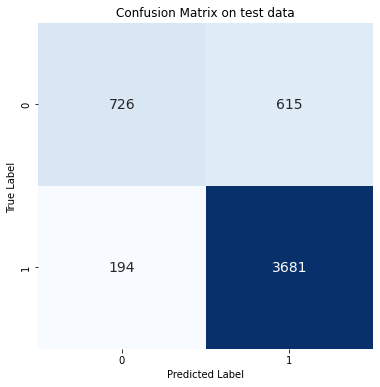

In [26]:
create_confusion_matrix(X_train, y_train)

20/20 [==============================] - 3s 118ms/step


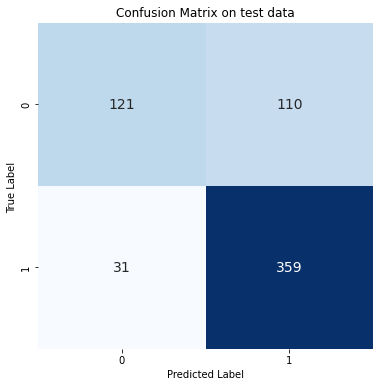

In [27]:
create_confusion_matrix(X_test, y_test)

In [32]:
#prediction
m_test_normal = load_images('C:/Chest xrays/chest_xray/val/NORMAL/')
m_test_pneu = load_images ('C:/Chest xrays/chest_xray/val/PNEUMONIA/')



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.63it/s]


In [33]:
m_pred_normal = np.round(model.predict(m_test_normal))
m_pred_pneu = np.round(model.predict(m_test_pneu))

1/1 [==============================] - 0s 79ms/step


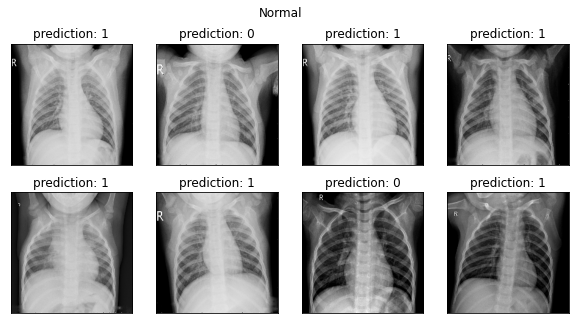

In [34]:
fig, axes = plt.subplots(ncols=4, nrows=2 , sharex=False, 
                         sharey=True, figsize=(10,5))
plt.suptitle('Normal')
index = 0
for i in range(2):
    for j in range(4):
        axes[i,j].set_title('prediction: ' + str(int(m_pred_normal[index][0])))
        axes[i,j].imshow(m_test_normal[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index +=1
plt.show()

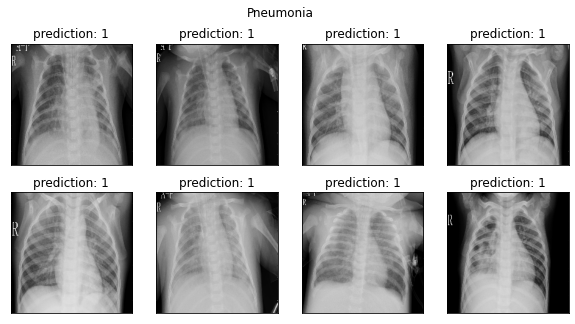

In [35]:
fig, axes = plt.subplots(ncols=4, nrows=2 , sharex=False, 
                         sharey=True, figsize=(10,5))
plt.suptitle('Pneumonia')
index = 0
for i in range(2):
    for j in range(4):
        axes[i,j].set_title('prediction: ' + str(int(m_pred_pneu[index][0])))
        axes[i,j].imshow(m_test_pneu[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index +=1
plt.show()